# __Week 1__: Natural Language Processing Basics
***

## Introduction to Natural Language Processing
- Natural Language Processing - automatic computational processing of human languages, goal: design algorithms to allow computers to "understand" natural language in order to perform some task
- Examples of tasks: spell checking, keyword search, parsing information from websites, documents, etc., machine translation (language translation), semantic analysis, question answering

## Terms
- Corpus - a body of text or collection of texts
- Stop words - commonly used words that are filtered out during cleaning ("the", "and", "a", etc.)
- Token - individual units of texts
- N-grams (unigrams, bigrams, trigrams, etc.) - tokens of size $N$ words
- Tokenization - separating text into tokens

### Tokenization

#### Sentence Tokenization

In [1]:
# using Phoebe Bridgers lyrics

sentence1 = "I get everything I want, I have everything I wanted. "
sentence2 = "I wanted to see the world, then I flew over the ocean and I changed my mind. "
sentence3 = "There are no words in the English language I could scream to drown you out. "

sentences = sentence1 + sentence2 + sentence3
sentence_list = [sentence1, sentence2, sentence3]

In [2]:
sentences

'I get everything I want, I have everything I wanted. I wanted to see the world, then I flew over the ocean and I changed my mind. There are no words in the English language I could scream to drown you out. '

In [3]:
sentence_list

['I get everything I want, I have everything I wanted. ',
 'I wanted to see the world, then I flew over the ocean and I changed my mind. ',
 'There are no words in the English language I could scream to drown you out. ']

In [4]:
import nltk

s = nltk.sent_tokenize(sentences)

for sentence in s:
    print(sentence + "\n")

I get everything I want, I have everything I wanted.

I wanted to see the world, then I flew over the ocean and I changed my mind.

There are no words in the English language I could scream to drown you out.



#### Unigram Tokenization

In [5]:
for sentence in sentence_list:
    words = nltk.word_tokenize(sentence)
    print(words)

['I', 'get', 'everything', 'I', 'want', ',', 'I', 'have', 'everything', 'I', 'wanted', '.']
['I', 'wanted', 'to', 'see', 'the', 'world', ',', 'then', 'I', 'flew', 'over', 'the', 'ocean', 'and', 'I', 'changed', 'my', 'mind', '.']
['There', 'are', 'no', 'words', 'in', 'the', 'English', 'language', 'I', 'could', 'scream', 'to', 'drown', 'you', 'out', '.']


#### N-gram Tokenization

In [6]:
from nltk import ngrams

n = 3

for sentence in sentence_list:
    n_grams = ngrams(sentence.split(), n)
    for gram in n_grams:
        print(gram)
    print('\n')

('I', 'get', 'everything')
('get', 'everything', 'I')
('everything', 'I', 'want,')
('I', 'want,', 'I')
('want,', 'I', 'have')
('I', 'have', 'everything')
('have', 'everything', 'I')
('everything', 'I', 'wanted.')


('I', 'wanted', 'to')
('wanted', 'to', 'see')
('to', 'see', 'the')
('see', 'the', 'world,')
('the', 'world,', 'then')
('world,', 'then', 'I')
('then', 'I', 'flew')
('I', 'flew', 'over')
('flew', 'over', 'the')
('over', 'the', 'ocean')
('the', 'ocean', 'and')
('ocean', 'and', 'I')
('and', 'I', 'changed')
('I', 'changed', 'my')
('changed', 'my', 'mind.')


('There', 'are', 'no')
('are', 'no', 'words')
('no', 'words', 'in')
('words', 'in', 'the')
('in', 'the', 'English')
('the', 'English', 'language')
('English', 'language', 'I')
('language', 'I', 'could')
('I', 'could', 'scream')
('could', 'scream', 'to')
('scream', 'to', 'drown')
('to', 'drown', 'you')
('drown', 'you', 'out.')




### How do we represent words as inputs to our models?
- Need some notion of similarity and difference between words
- With __word vectors__, we can easily encode this ability in the vectors themselves

### What are word vectors?
- There are an estimated 13 million tokens (words) in the English language, and they are not all unrelated!
- Thus, we want to encode words token each into some vector that represents a point in some sort of "word" space
    - Each dimension would encode some meaning that we transfer using speech (i.e. semantic dimensions might indicate tense, count, gender, etc.)
- Also called word embeddings

__One-hot Vector__ (Most simple word embedding case): 
<img src="/figures/onehot.png" alt="One hot encoding example" title="One hot encoding" width="500"/>

__Co-occurence Matrix__ (count the number of times each words appears inside a window of a particular size around a word of interest):
<img src="/figures/com.png" alt="co-occurence matrix example" title="co-occurence matrix" width="500"/>

## Word2Vec
- popular technique to learn word embeddings using shallow neural networks, objective: have words with similar context occupy close spatial positions
- continuous bag-of-words (CBOW) and skip-gram

### Continuous Bag-of-Words (CBOW)
- aims to predict a center word from the surrounding context in terms of word vectors

In [1]:
import multiprocessing

from gensim.models import Word2Vec

from gensim.test.utils import common_texts

import os

import re

/opt/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# importing dataset of diologue from every Spongebob episode

f = []

for filename in os.listdir("../spongebob"):
    x = open("../spongebob/"+str(filename), "r")
    f.append(x.read())
    #print(filename)

In [4]:
# remove punctutation/symbols

f_clean = []

for episode in f:
    f_clean.append(re.sub(r'[^\w]', ' ', episode))

In [5]:
f_clean

['  At boating school  SpongeBob is doing a boating test   Mrs  Puff   she reads off her clipboard  Now  SpongeBob  what is the proper procedure for making a right turn  SpongeBob   thinks  Hold on  I ll check the textbook   gets the textbook  Ah   Your Mirror and You   Hmm  proper seat belt hygiene  No   he continues to look at the textbook as Mrs  Puff puts on a helmet  Mrs  Puff  Assuming crash position   Mrs  Puff screams as the boat is about to hit a wall  SpongeBob turns the boat quick enough so it doesn t crash  The boat is still out of control  and the two continue screaming  He puts his tongue on the breaks and stops the boat before it hits the lighthouse   Mrs  Puff   relieved  We didn t crash  SpongeBob   happy  Hooray   The boat goes a little forward and hits the platform of the lighthouse  The two are scared as everything in it falls out  SpongeBob comes out of the rubble but Mrs  Puff doesn t   SpongeBob   worried and calls out  Mrs  Puff  Oh  there you are   pulls Mrs  P

In [10]:
# tokenize
f_tokenize = []

for episode in f_clean:
    f_tokenize.append(nltk.word_tokenize(episode))

In [11]:
# remove stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

no_stop_tokens = []

for episode in f_tokenize:
    filtered_episode = [w for w in episode if not w.lower() in stop_words]
    no_stop_tokens.append(filtered_episode)

{'over', 'or', 'in', 'further', 'you', 'such', "you're", 'just', "hadn't", 'weren', "wouldn't", 'doing', 've', 'we', "needn't", 'them', 'below', 'both', 'under', 'being', "don't", 'what', 'here', 'than', 'needn', 'be', 'their', 'out', 'hasn', 'yourselves', 'o', 'then', 'hadn', 'were', 'ain', "haven't", 'how', 'each', "mightn't", 'are', 'where', 're', 'until', 'during', 'those', 'any', 't', 'not', 'he', 'hers', 'can', 'so', 'couldn', 'of', 'your', 'wasn', 'on', 'they', 'to', 'y', "shan't", 'themselves', "that'll", 'his', 'been', 'if', 'between', 'have', 'yours', "you'll", 'its', 'shan', 'into', 'i', 'her', 'these', 'about', 'a', 'up', 'at', 'few', 'whom', 'while', 'it', 'nor', 'ma', 'and', 'won', 'theirs', 'myself', 'yourself', 'through', 'didn', 'has', "shouldn't", 'had', 'will', 'this', "wasn't", 'same', 'should', 'own', "weren't", 'why', 'was', 'did', 'an', 'when', 'shouldn', "should've", "you've", 'wouldn', 'having', 'me', 'haven', "hasn't", 'don', 'd', 'is', 'some', 'down', 'most',

In [12]:
# lowercase all tokens

final_data = []

for episode in no_stop_tokens: 
    for i in range(len(episode)):
        episode[i] = episode[i].lower()
    final_data.append(episode)

In [13]:
print(final_data[0][:100])

['boating', 'school', 'spongebob', 'boating', 'test', 'mrs', 'puff', 'reads', 'clipboard', 'spongebob', 'proper', 'procedure', 'making', 'right', 'turn', 'spongebob', 'thinks', 'hold', 'check', 'textbook', 'gets', 'textbook', 'ah', 'mirror', 'hmm', 'proper', 'seat', 'belt', 'hygiene', 'continues', 'look', 'textbook', 'mrs', 'puff', 'puts', 'helmet', 'mrs', 'puff', 'assuming', 'crash', 'position', 'mrs', 'puff', 'screams', 'boat', 'hit', 'wall', 'spongebob', 'turns', 'boat', 'quick', 'enough', 'crash', 'boat', 'still', 'control', 'two', 'continue', 'screaming', 'puts', 'tongue', 'breaks', 'stops', 'boat', 'hits', 'lighthouse', 'mrs', 'puff', 'relieved', 'crash', 'spongebob', 'happy', 'hooray', 'boat', 'goes', 'little', 'forward', 'hits', 'platform', 'lighthouse', 'two', 'scared', 'everything', 'falls', 'spongebob', 'comes', 'rubble', 'mrs', 'puff', 'spongebob', 'worried', 'calls', 'mrs', 'puff', 'oh', 'pulls', 'mrs', 'puff', 'rubble', 'ends']


#### Building Word2Vec model

In [14]:
model = Word2Vec(min_count=10,window=2,workers=4)

In [15]:
model.build_vocab(final_data)

In [16]:
model.train(final_data, total_examples=model.corpus_count, epochs=30, report_delay=1)

(12174228, 15382710)

In [17]:
model.init_sims(replace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  """Entry point for launching an IPython kernel.


#### Exploring the Model

In [18]:
model.wv.most_similar(positive=["spongebob"])

[('patrick', 0.7628273963928223),
 ('squidward', 0.6911920309066772),
 ('pat', 0.5070880651473999),
 ('doodlebob', 0.4548243284225464),
 ('boaty', 0.44876816868782043),
 ('doc', 0.443855345249176),
 ('buddy', 0.4382757544517517),
 ('stupidly', 0.4306938052177429),
 ('mr', 0.4297105669975281),
 ('gary', 0.42621544003486633)]

In [19]:
model.wv.most_similar(positive=["gary"])

[('meow', 0.7041603326797485),
 ('snail', 0.5905637741088867),
 ('lary', 0.5399686098098755),
 ('gramma', 0.5332546234130859),
 ('gare', 0.49999746680259705),
 ('bowl', 0.49882498383522034),
 ('spot', 0.4696282148361206),
 ('purrs', 0.4688987731933594),
 ('meows', 0.4623522162437439),
 ('smelly', 0.4510788917541504)]

In [20]:
model.wv.similarity("krabs", 'pearl')

0.2594025

In [21]:
model.wv.similarity("squidward", 'happy')

0.08478564

In [22]:
model.wv.similarity("patrick", 'rock')

0.4182155

In [36]:
model.wv.similarity("patrick", 'smart')

0.053719997

In [23]:
model.wv.similarity("patrick", 'stupidly')

0.43809515

## GloVe: Global Vectors for Word Representation

- trains on global word-word co-occurence count
- produces a word vector space with meaningful substructure
- uses global statistics to predict the probability of word $j$ appearing in the context of word $i$ with a least squares objective

In [24]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from scipy import spatial

from sklearn.manifold import TSNE

In [25]:
embeddings_dict = {}

with open("../glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [26]:
len(embeddings_dict)

400000

In [27]:
# finding similar vectors
# using Euclidean distance to measure how far apart two embeddings are

def find_n_closest_embeddings(embedding,n):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))[1:n+1]

In [28]:
find_n_closest_embeddings(embeddings_dict["obama"], 5)

['barack', 'bush', 'clinton', 'mccain', 'dole']

In [29]:
find_n_closest_embeddings(embeddings_dict["cat"], 5)

['dog', 'rabbit', 'monkey', 'cats', 'rat']

In [30]:
find_n_closest_embeddings(embeddings_dict["coffee"], 5)

['drink', 'tea', 'drinks', 'beer', 'wine']

In [31]:
# Math with Words! 
print(find_n_closest_embeddings(embeddings_dict["woman"] - embeddings_dict["man"] + embeddings_dict["king"],1))

['queen']


In [32]:
print(find_n_closest_embeddings(embeddings_dict["halloween"] - embeddings_dict["spooky"],1))

['eve']


In [33]:
# Visualizing vectors
# n_components - number of dimensions we reduce the data into
# random state - seed to obtain consistent results

tsne = TSNE(n_components=2, random_state=0) 

words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]

Y = tsne.fit_transform(vectors[:500])

In [34]:
# Storing data in DataFrame
df = pd.DataFrame()
df["label"] = words[:500]
df["comp-1"] = Y[:,0]
df["comp-2"] = Y[:,1]

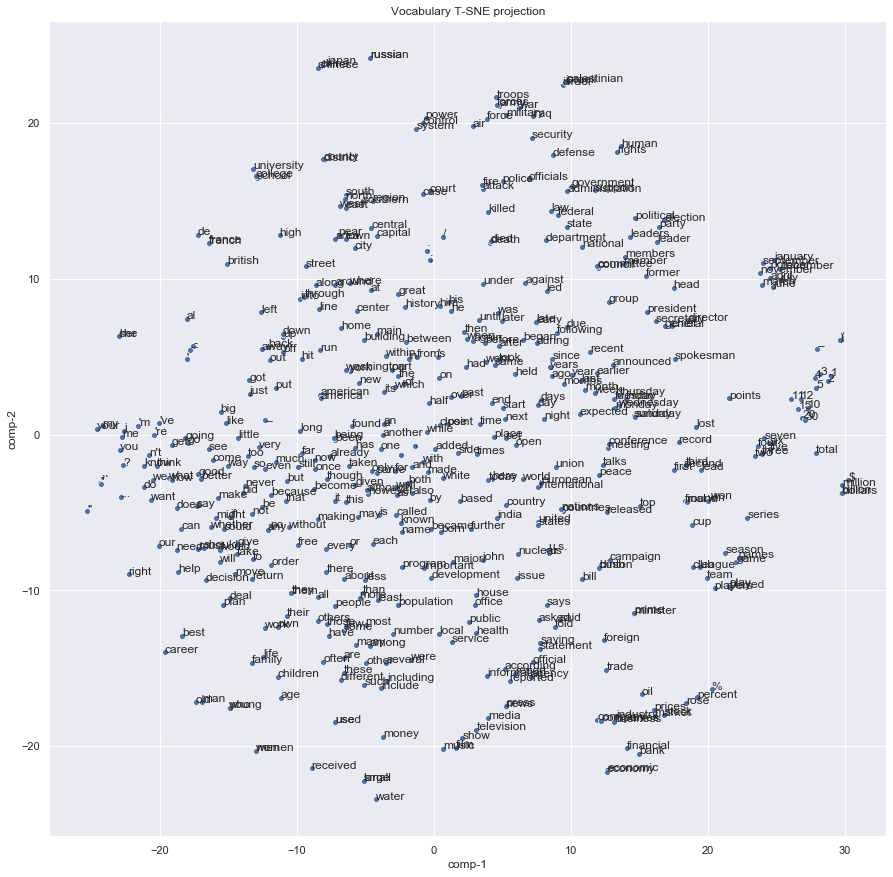

In [35]:
sns.set(rc={'figure.figsize':(15,15)})

sns.scatterplot(x="comp-1", y="comp-2", 
                data=df).set(title="Vocabulary T-SNE projection") 

for i in range(df.shape[0]):
    plt.text(x=df["comp-1"][i], y=df["comp-2"][i], s=df["label"][i])

## Sources
[1] http://web.stanford.edu/class/cs224n/index.html#schedule <br>
[2] https://machinelearningmastery.com/natural-language-processing/ <br>
[3] https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa <br>
[4] https://nlp.stanford.edu/projects/glove/ <br>
[5] https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db <br>
[6] https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial <br>
[7] https://www.kaggle.com/mikhailgaerlan/spongebob-squarepants-completed-transcripts <br>